In [140]:
# import required libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [141]:
# load dataset
df = pd.read_csv("UsArrests.csv", index_col = 'City')
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600


In [142]:
# check shape of the data
print('Number of cases: {} \nNumber of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 50 
Number of features: 4


In [143]:
# Count missing values
missing = df.isnull().sum()
print(missing)

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


Good news! There are no missing values in the dataset. 

In [144]:
# Check for the object type in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


We have total four features in which two are float and other two are integer data type.

In [145]:
# summarise the statistical properties of the columns:

#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


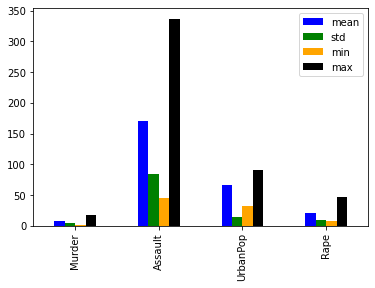

In [146]:
# plot the descriptive stastistics of the data
selected_stats.plot.bar(color = ['blue', 'green', 'orange', 'black'])
plt.show()

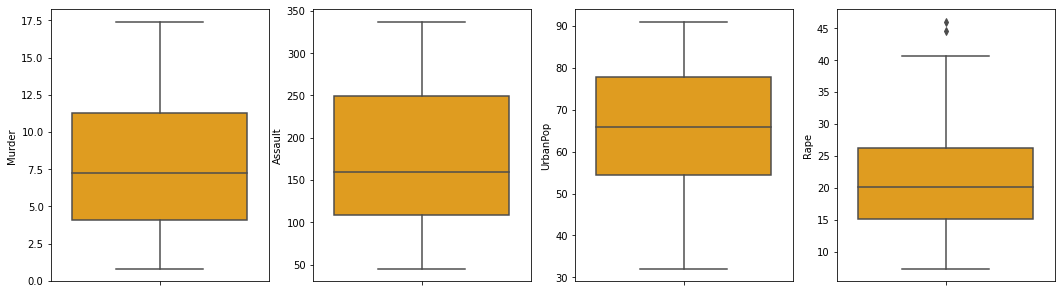

In [147]:
fig, ax = plt.subplots(ncols=4, figsize = (18, 5))

# Creating plot
sns.boxplot(data = df, y = 'Murder', ax = ax[0], color='orange')
sns.boxplot(data = df, y = 'Assault', ax = ax[1], color='orange')
sns.boxplot(data = df, y = 'UrbanPop', ax = ax[2], color='orange')
sns.boxplot(data = df, y = 'Rape', ax = ax[3], color='orange')
# show plot
plt.show()

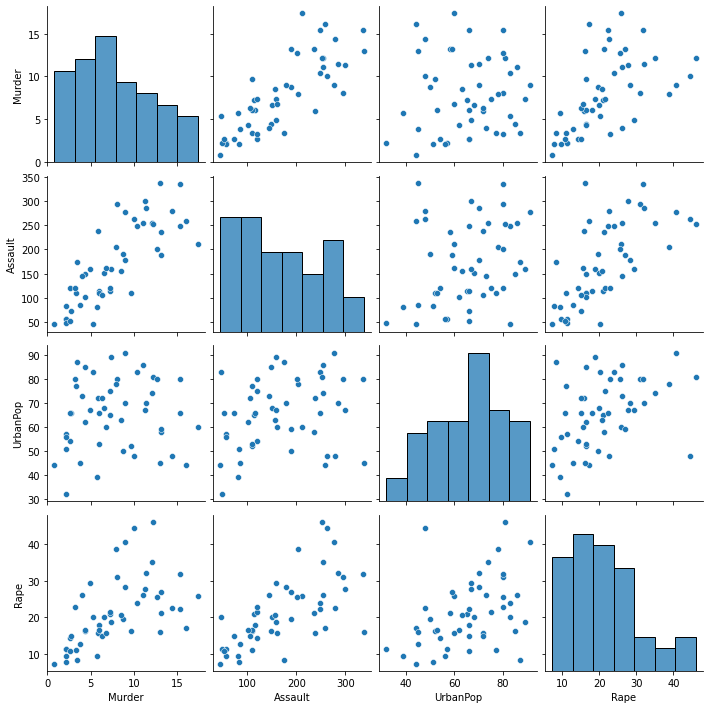

In [148]:
# plot a scatter matrix to check the relationship between features
sns.pairplot(df)
plt.show()

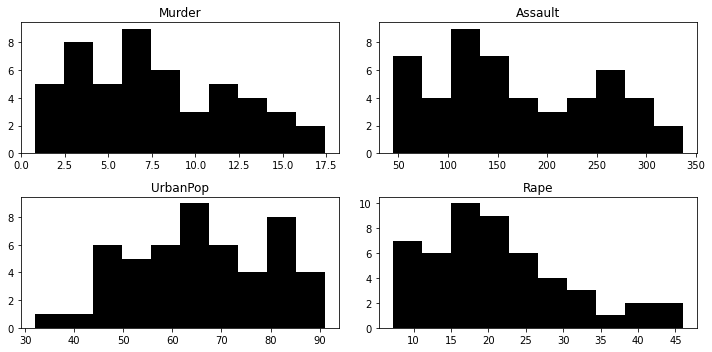

In [149]:
# Plot histograms of each features in the dataset
histograms = df.hist(color='black', grid=False, figsize=(10, 5))
plt.tight_layout()
plt.show()

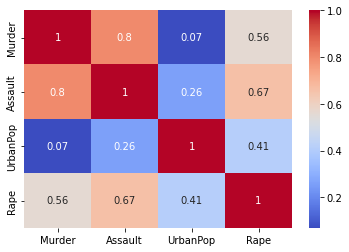

In [150]:
# Correlation Analysis of the dataset
city = df.index
corr_df = df.corr()
labels =corr_df.columns

# get the correlation martix
correlations = corr_df.corr()

# plot the heatmap of correlation
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.show()

In [151]:
# create PCA 
pca = PCA()

X = df.values.squeeze()
# fit and transform the model
X_trans = pca.fit_transform(df)

# create a dataframe with new components
df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


In [152]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73240025 14.21240185  6.48942607  2.48279   ]


In [153]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]


In [154]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11485102 7213.10721735 7255.2198681  7261.38411429]


In [155]:
def biplot(score, coeff, labels=None, points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = city[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

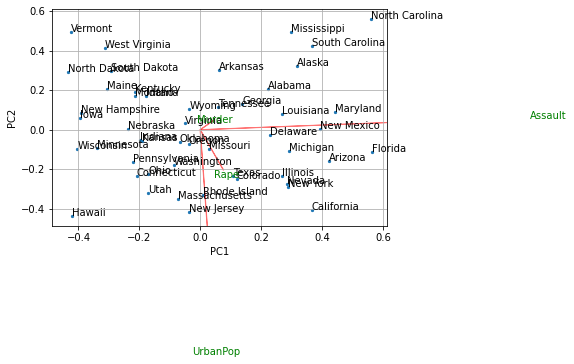

In [156]:

biplot(X_trans[:,0:2], np.transpose(pca.components_[0:2, :]), list(labels), list(city))
plt.show()

In [157]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201



We see that the GDP has by far the highest importance in the first principle component, while several features are relatively important for the second component: mortality for males and females being the most important at around 0.6 These observations agree with those deduced from the biplot. If we refer to our summarised statistics from earlier on, the mean values for these features are much larger numbers than those for the other features. It is possible that because of this, these features 'swamp' the others, which results in them being ignored.

### Standardised data

We standardise the data so that some features do not swamp the others.

In [158]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


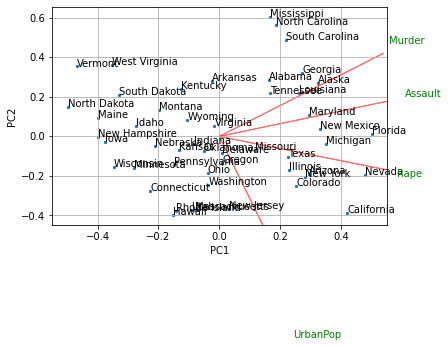

In [159]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

We see that the standardised data results in far more variables being utilised to explain the variance, as the large numbers no longer dominate it. We also see that the the different features cluster together in groups.

In [160]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


Inspecting the feature importance now, we see that most of the variables contribute fairly evenly, with only some with low importance.

Text(0.5, 1.0, 'Cumulative Explained Variance')

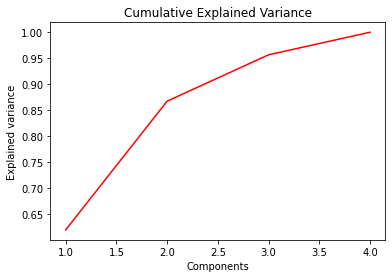

In [161]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

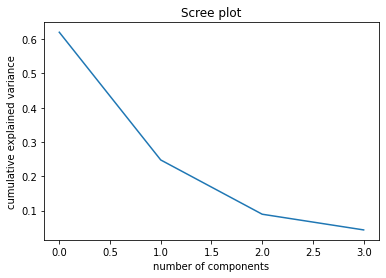

In [162]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first 5 principal components together explain around 90% of the variance. We can therefore use them to perform cluster analysis. This is what we refer to as dimensionality reduction. We began with 19 variables and now we have 5 variables explaining most of the variability. 


In [163]:
pca_df = pd.DataFrame(X_std_trans[:,0:5], index = df.index)
pca_df.head()

,0,1,2,3
City,,,,
Alabama,0.986,1.133,-0.444,0.156
Alaska,1.950,1.073,2.040,-0.439
Arizona,1.763,-0.746,0.055,-0.835
Arkansas,-0.141,1.120,0.115,-0.183
California,2.524,-1.543,0.599,-0.342


## Hierarchical clustering


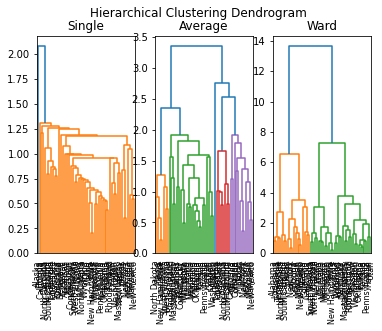

In [164]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Ward")
dendrogram(linkage(pca_df, method='ward'), labels=pca_df.index, ax=ax3)
plt.show()

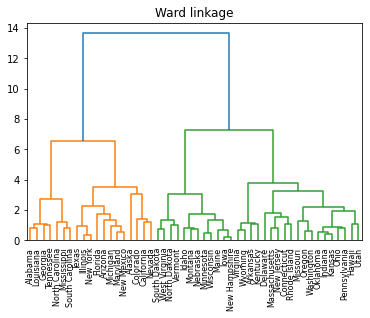

In [165]:
plt.title("Ward linkage")
dendrogram(linkage(pca_df, method='ward'), labels=pca_df.index)
plt.show()

### K-means clustering

K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It is an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. Another drawback with K-means is the necessity of specifying K in advance.

For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 3. A visualisation of the clusters is shown in the figure below.


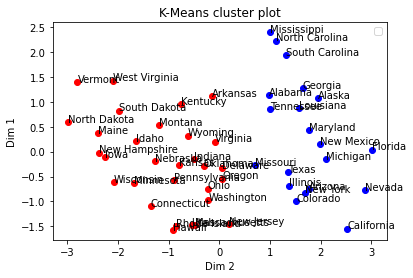

In [166]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = city[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [167]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]


group0 = np.array(city)[group0_indices]
group1 = np.array(city)[group1_indices]



print("Group 0: {}\n\n".format([df.loc[x] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x] for x in group1]))



Group 0: [Murder       8.800
Assault    190.000
UrbanPop    50.000
Rape        19.500
Name: Arkansas, dtype: float64, Murder       3.300
Assault    110.000
UrbanPop    77.000
Rape        11.100
Name: Connecticut, dtype: float64, Murder       5.900
Assault    238.000
UrbanPop    72.000
Rape        15.800
Name: Delaware, dtype: float64, Murder      5.300
Assault    46.000
UrbanPop   83.000
Rape       20.200
Name: Hawaii, dtype: float64, Murder       2.600
Assault    120.000
UrbanPop    54.000
Rape        14.200
Name: Idaho, dtype: float64, Murder       7.200
Assault    113.000
UrbanPop    65.000
Rape        21.000
Name: Indiana, dtype: float64, Murder      2.200
Assault    56.000
UrbanPop   57.000
Rape       11.300
Name: Iowa, dtype: float64, Murder       6.000
Assault    115.000
UrbanPop    66.000
Rape        18.000
Name: Kansas, dtype: float64, Murder       9.700
Assault    109.000
UrbanPop    52.000
Rape        16.300
Name: Kentucky, dtype: float64, Murder      2.100
Assault    83.000

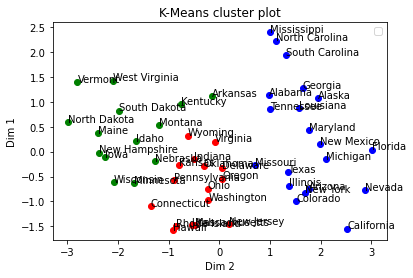

In [168]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = city[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [169]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(city)[group0_indices]
group1 = np.array(city)[group1_indices]
group2 = np.array(city)[group2_indices]


print("Group 0: {}\n\n".format([df.loc[x] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x] for x in group1]))
print("Group 2: {}\n\n".format([df.loc[x] for x in group2]))



Group 0: [Murder       3.300
Assault    110.000
UrbanPop    77.000
Rape        11.100
Name: Connecticut, dtype: float64, Murder       5.900
Assault    238.000
UrbanPop    72.000
Rape        15.800
Name: Delaware, dtype: float64, Murder      5.300
Assault    46.000
UrbanPop   83.000
Rape       20.200
Name: Hawaii, dtype: float64, Murder       7.200
Assault    113.000
UrbanPop    65.000
Rape        21.000
Name: Indiana, dtype: float64, Murder       6.000
Assault    115.000
UrbanPop    66.000
Rape        18.000
Name: Kansas, dtype: float64, Murder       4.400
Assault    149.000
UrbanPop    85.000
Rape        16.300
Name: Massachusetts, dtype: float64, Murder       7.400
Assault    159.000
UrbanPop    89.000
Rape        18.800
Name: New Jersey, dtype: float64, Murder       7.300
Assault    120.000
UrbanPop    75.000
Rape        21.400
Name: Ohio, dtype: float64, Murder       6.600
Assault    151.000
UrbanPop    68.000
Rape        20.000
Name: Oklahoma, dtype: float64, Murder       4.900
As

In [170]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [171]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [172]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(pca_df)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

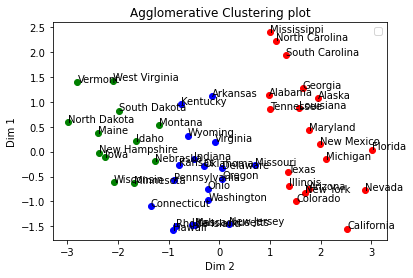

In [176]:
# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[y_pred == i],y[y_pred == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = city[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("Agglomerative Clustering plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [173]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(y_pred==0).transpose()[0]
group1_indices = np.argwhere(y_pred==1).transpose()[0]
group2_indices = np.argwhere(y_pred==2).transpose()[0]

group0 = np.array(city)[group0_indices]
group1 = np.array(city)[group1_indices]
group2 = np.array(city)[group2_indices]


print("Group 0: {}\n\n".format([df.loc[x] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x] for x in group1]))
print("Group 2: {}\n\n".format([df.loc[x] for x in group2]))

Group 0: [Murder      13.200
Assault    236.000
UrbanPop    58.000
Rape        21.200
Name: Alabama, dtype: float64, Murder      10.000
Assault    263.000
UrbanPop    48.000
Rape        44.500
Name: Alaska, dtype: float64, Murder       8.100
Assault    294.000
UrbanPop    80.000
Rape        31.000
Name: Arizona, dtype: float64, Murder       9.000
Assault    276.000
UrbanPop    91.000
Rape        40.600
Name: California, dtype: float64, Murder       7.900
Assault    204.000
UrbanPop    78.000
Rape        38.700
Name: Colorado, dtype: float64, Murder      15.400
Assault    335.000
UrbanPop    80.000
Rape        31.900
Name: Florida, dtype: float64, Murder      17.400
Assault    211.000
UrbanPop    60.000
Rape        25.800
Name: Georgia, dtype: float64, Murder      10.400
Assault    249.000
UrbanPop    83.000
Rape        24.000
Name: Illinois, dtype: float64, Murder      15.400
Assault    249.000
UrbanPop    66.000
Rape        22.200
Name: Louisiana, dtype: float64, Murder      11.300
As